In [8]:
# Slides for Probability and Statistics module, 2016-2017
# Matt Watkins, University of Lincoln

#### Example

We have a sample of size 10 from a distribution that we think is at least normal to a reasonable approximation. 

If the sample mean is 10 and the sample variance 3, what is a 90% confidence interval for the population mean.

#### Solution  

We need the critical value for a symmetric 90% confidence interval of a $t(9)$ distribution. We can find $t_{0.90} (9) = 1.833$.  

```
print(stats.t.ppf(0.95,9))
1.83311293265
```
A 90 percent interval for the unknown mean based on a sample of size $n$ is between 
$\bar{x} - 1.833\frac{S}{\sqrt{n}}$ and $\bar{x} + 1.8333\frac{S}{\sqrt{n}}$ so
$$
= 10 - 1.8333\times 3/\sqrt(10) \lt \mu \lt 10 + 1.8333\times 3/\sqrt(10) \\
= 8.26 \lt \mu \lt 11.74
$$.  

## Distribution of samples

We've talked about the overal properties of samples, in terms of the statistics $\bar{X}$ and $S$.

The second main theorem of probability theory is the 'central limit theorem'. This can be stated in various ways, but we'll follow Snell and go with

#### Central limit Theorem

Let $S_n = X_1 + X_2 + X_3 + \ldots + X_n$ be the sum of $n$ independent continuous random variables with common probability density function $f$ with expectation $mu$ and variance $\sigma^2$. Let $S_N^* = \frac{(S_n - n \mu)}{\sigma \sqrt{n}}$. Then we have, for all $a \lt b$,

$$
\lim_{n \to \infty} P(a \lt S_n^* \lt b) = \frac{1}{\sqrt{2 \pi}} \int_a^b e^{-\frac{x^2}{2}} \text{d}x
$$

## Bernoulli trials

let's consider a case when we have a set of independent trials with probability of success $p$ for each trial.

We let the sequence of random variables $X_i = 1$ or $0$ according as the $i^{th}$ outcome is a success of failure, and define another random variable as their sum $S_n = X_1 + X_2 + \ldots X_n$

Then $S_n$ is the number of successes in $n$ independent trials - this is exactly the setup for a binomial distribution: $S_n$ will be binomially distributed with $n=n$, $p = p$.

What happens as we increase $n$?

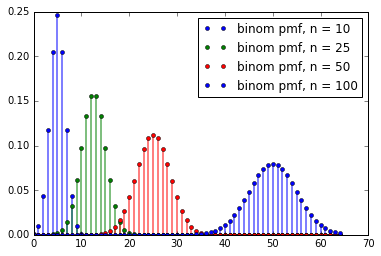

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 1)

x = np.arange(0,stats.binom.ppf(0.999, 100, 0.5))

n, p = 10, 0.5

ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=4, label='binom pmf, n = 10');
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=2, alpha=0.5);

n, p = 25, 0.5

ax.plot(x, stats.binom.pmf(x, n, p), 'go', ms=4, label='binom pmf, n = 25');
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='g', lw=2, alpha=0.5);

n, p = 50, 0.5

ax.plot(x, stats.binom.pmf(x, n, p), 'ro', ms=4, label='binom pmf, n = 50');
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='r', lw=2, alpha=0.5);

n, p = 100, 0.5

ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=4, label='binom pmf, n = 100');
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=2, alpha=0.5);

ax.legend();

The expectation value of a binomial distribution is $np$ - they move to the right as $n$ increases 

They flatten out - $\sigma^2 = np(1-p)$, and the sum of the probability mass function must be one.

We standardize our plots by taking a new random variable $S^*_n$ given by

$$
S^*_n = \frac{S_n - np}{\sqrt{np(1-p)}}
$$

### Standardized

lets try plotting $S^*_n$ against a standard normal distribution

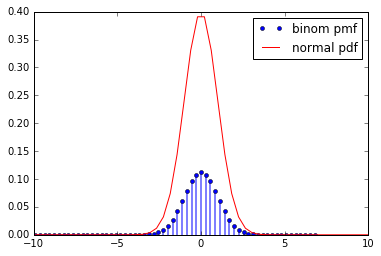

In [3]:
fig, ax = plt.subplots(1, 1)

n, p = 50, 0.5

x = np.arange(-10,50)
xs = (x - n*p)/np.sqrt(n*p*(1-p))

xcont = np.linspace(-10,10)


ax.plot(xs, stats.binom.pmf(x, n, p), 'bo', ms=4, label='binom pmf');
ax.vlines(xs, 0, stats.binom.pmf(x, n, p), colors='b', lw=2, alpha=0.5);

ax.plot(xcont, stats.norm.pdf(xcont), 'r-', label='normal pdf');
ax.legend();

OK the shape looks good, but the heights are clearly off. The heights of the spikes sum to one - as $n$ gets big we can take this to approximate an integral of the area under a curve drawn through the points. 

This would work for the original $S_n$ as the widths of the small areas would be 1. Here the widths of the small areas are $$ w = \frac{1}{\sqrt{np(1-p)}}= \frac{1}{\sqrt{npq}}$$

we've defined $q = 1-p$ for convenience.

So we can multiply by $\frac{1}{w}$ to get heights comparable to the normal distribution.

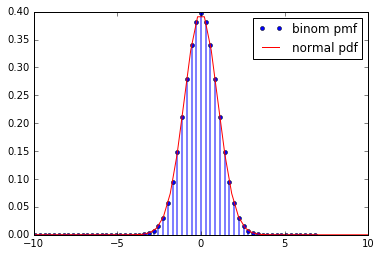

In [4]:
fig, ax = plt.subplots(1, 1)

n, p = 50, 0.5

x = np.arange(-10,50)

# scale to a standard variable
xs = (x - n*p)/np.sqrt(n*p*(1-p))

# use a finer mesh for the continous function
xcont = np.linspace(-10,10)

ax.plot(xs, stats.binom.pmf(x, n, p)*np.sqrt(n*p*(1-p)), 'bo', ms=4, label='binom pmf');
ax.vlines(xs, 0, stats.binom.pmf(x, n, p)*np.sqrt(n*p*(1-p)), colors='b', lw=2, alpha=0.5);

ax.plot(xcont, stats.norm.pdf(xcont), 'r-', label='normal pdf');
ax.legend();

pretty good fit! Note that this is for a symmetric distribtution ($p = 0.5$) for other distributions $n$ needs to be moderately large to get a very good fit

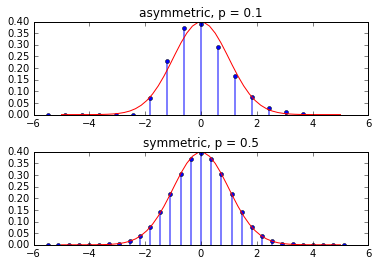

In [5]:
# have two plots this time
fig, ax = plt.subplots(2, 1)

n, p = 30, 0.1

x = np.arange(-6,10)

# scale to a standard variable
xs = (x - n*p)/np.sqrt(n*p*(1-p))

# use a finer mesh for continuous functions
xcont = np.linspace(-5,5)

ax[0].plot(xs, stats.binom.pmf(x, n, p)*np.sqrt(n*p*(1-p)), 'bo', ms=4, label='binom pmf');
ax[0].vlines(xs, 0, stats.binom.pmf(x, n, p)*np.sqrt(n*p*(1-p)), colors='b', lw=2, alpha=0.5);

ax[0].plot(xcont, stats.norm.pdf(xcont), 'r-', label='normal pdf');
ax[0].set_title("asymmetric, p = 0.1");

n, p = 30, 0.5

x = np.arange(0,30)
xs = (x - n*p)/np.sqrt(n*p*(1-p))

ax[1].plot(xs, stats.binom.pmf(x, n, p)*np.sqrt(n*p*(1-p)), 'bo', ms=4, label='binom pmf');
ax[1].vlines(xs, 0, stats.binom.pmf(x, n, p)*np.sqrt(n*p*(1-p)), colors='b', lw=2, alpha=0.5);

ax[1].plot(xcont, stats.norm.pdf(xcont), 'r-', label='normal pdf');
ax[1].set_title("symmetric, p = 0.5");

fig.subplots_adjust(hspace=0.4)

This suggests that we can approximate a binomial distribution by a normal one, if $n$ is large enough.

What we have done is to say that if we consider some point on the x-axis, $x$, then the nearest spike to it on the binomial distribution would be j, where  $<>$ is the integer closest to the value within the $<>$.   

Then we have

$$
\lim_{n \to \infty} \sqrt{npq} \cdot \text{binom}(<np+x\sqrt{npq}>, n, p) = n(x)
$$

this is a version of the central limit theorem specialised to the Binomial distribution.

### Approximating Binomial distributions

We can turn the last statement around: If we wish to approximate $b(n,p,j)$, we find the value of $x$ corresponding to $j$

$$
x = \frac{j-np}{\sqrt{npq}}
$$

Then our last expression shows that

$$
\sqrt{npq} \cdot \text{binom}(j,n,p) \approx n(x)
$$

so

$$
\begin{align}
\text{binom}(j,n,p) & \approx \frac{n(x)}{\sqrt{npq}}\\
         & = \frac{1}{\sqrt{npq}} n \Bigg( \frac{j - np}{\sqrt{npq}} \Bigg)
\end{align}
$$

**example**

Estimate the probability of getting exactly 55 heads in 100 tosses of a (fair) coin.

We can approximate the binomial distribution with a normal distribution here. $np = 100 \cdot 0.5 = 50$ and $\sqrt{npq} = \sqrt{100 \cdot 0.5 \cdot 0.5} = 5$.

The $x$ location of the standard normal distribution that corresponds to $55$ successes in our binomial distibution is 

$$
x = \frac{55-50)}{5}=1
$$

and we have 

$$
P(S_{100} = 55) \approx \frac{n(1)}{5} = \frac{1}{5} \Bigg( \frac{1}{\sqrt{2 \pi}}e^{-\frac{1}{2}} \Bigg) \\
                                        = 0.0484
$$

and we can check the exact (to machine precision) answer

`
stats.binom.pmf(55, 100, 0.5)
0.048474296626427174
`

## Central Limit Theorem for Bernoulli trials processes

Collecting together what we've just looked at we have:

Let $S_n$ be the number of sucesses in $n$ Bernoulli trials with probability $p$ and let $a$ and $b$ be two fixed real numbers

$$
\lim_{n \to \infty} P\Big(a \le \frac{S_n-np}{\sqrt{npq}} \le  b \Big) = \int_a^b n(x)\text{d}x = N(b) - N(a)
$$

where $n$ and $N$ are the probability density function and the cumulative distribution function of a standard normal distribution.

## Approximating binomial distributions 

We can use the expression above to approximate a probability of the form 
$$
P(i \le S_n \le j)
$$

where $i$ and $j$ are integers betweeen 0 and $n$, if $n$ is reasonably large. 

It is generally a good idea to apply a "continuity correction", and look for values between $i - 0.5$ and $j+0.5$. Then we can standardize and look for

$$
P\Big(\frac{i-0.5-np}{\sqrt{npq}} \le S_{100}^* \le \frac{j+0.5-np}{\sqrt{npq}} \Big)
$$

**Example**

A coin is flipped 100 times. What is the probablity that the number of heads is between 40 and 60?



$S_n$ is our number of successes (heads here). The expected number of heads is $np = 100\times0.5 = 50$ and the (population) standard deviation is $\sqrt{npq}=\sqrt{100 \cdot 0.5 \cdot 0.5} = 5$.

Then we can use the previous results to estimate

$$
\begin{align}
P(40 \le S_n \le 60) & \approx P\big( \frac{40-0.5-50}{5} \le S_{100}^* \le \frac{60+0.5-50}{5}  \big) \\
                     & = P(-2.1 \le S_{100}^* \le 2.1) \\
                     & = N(2.1) - N(-2.1)
\end{align}
$$

```
stats.norm.cdf(2.1) - stats.norm.cdf(-2.1)
0.96427115887436687
```

the exact answer is
```
stats.binom.cdf(60,100,0.5) - stats.binom.cdf(39,100,0.5)
0.96479979978229524
```

Note that this is the probability that the number of heads is within two standard deviations of the mean.

We could instead ask what are the values that we are 99% confident that the number of heads will fall between?

In [2]:
stats.norm.ppf(0.995)

2.5758293035489004

In [3]:
stats.norm.ppf(0.005)

-2.5758293035489008

these are the values of the standardized variables. So we need to reverse our transformation to estimate the integer values.

Lower bound is found from 

$$
-2.576 = \frac{i-0.5-50}{5} \\
\implies i =  <-2.576 \times 5+50.5> \\
           \approx 38
$$

and the upper bound 

$$
2.576 = \frac{j+0.5-50}{5} \\
\implies j =  <2.576 \times 5 + 49.5> \\
           \approx 63
$$


## Moments of a distribution

This is a diversion, but useful and will give us a sketch of how we could go about proving the Central Limit Theorem for general distributions of random variables.

Up till now we've concentrated on two properties of a distribution - namely the expectation and variance. But those two values don't fully characterize a distribution. For instance, two random variables $X$ and $Y$ have distributions

$$
p_X = \left( \begin{array}{cccccc}
1 & 2 & 3 & 4 & 5 & 6\\
0 & 1/4 & 1/2 & 0 & 0 & 1/4 \end{array} \right)
$$

$$
p_Y = \left( \begin{array}{ccc}
1 & 2 & 3 & 4 & 5 & 6\\
1/4 & 0 & 0 & 1/2 & 1/4 & 0 \end{array} \right)
$$

they could be dodgy dice. We have $\text{E[$X$]} = \text{E[$Y$]} = 7/2$ and $\text{var($X$)} = \text{var($Y$)} = 9/4$. But they are definitely different dice.

The moments of a discrete distribution are defined as 
$$
\mu_k = k^{th} \text{moment of $X$} \\
       = \text{E[$X^k$]} \\
       = \sum_{j=1}^{\infty} (x_j^k)p(x_j)
$$

We've already met the first moment of a distribution is

$$
\mu = \text{E[X]} = \mu_1
$$

and from our usual working definition of the variance $\text{var}(X) = \text{E}[X]^2 - \text{E}[X^2]$ we see that 

$$
\text{var($X$)} = \sigma_X^2 = \mu_2 - \mu_1^2
$$


## Moment generating functions

there is a convenient way of describing the moments of a distribution. We can define a new function $g(t)$, where $t$ is a new variable as follows:

$$
\begin{align}
g(t) & = \text{E[$e^{tX}$]} \\
     & = \sum_{k=0}^{\infty} \frac{\mu_k t^k}{k!} \\
     & = \text{E[$\sum_{k=0}^{\infty} \frac{X^k t^k}{k!}$]} \\
     & = \sum_{j=1}^{\infty} e^{tx_j}p(x_j)
\end{align}
$$

the reason to do this is that if we differentiate $g(t)$ $n$ times, then set $t=0$, we get $\mu_n$

$$
\begin{align}
\frac{\text{d}^n}{\text{d}t^n} g(t) \mid_{t=0} & = g^{(n)}(0) \\
    & = \sum_{k=n}^{\infty} \frac{k! \mu_k t^{k-n}}{(k-n)!k!} \Bigg|_{t=0}\\
    & = \mu_n
\end{align}
$$

**example**

let $X$ be a discrete random variable with range $\{0,1,2,3,\ldots\}$ and pmf $p_X (j) = e^{-\lambda}\lambda^j/j!$ for all $j$. 

This is a Poisson distribution with mean $\lambda$. Then

$$
\begin{align}
g(t) & = \sum_{j=0}^{\infty} e^{tj} \frac{ e^{-\lambda} \lambda^j}{j!} \\
     & = e^{-\lambda} \sum_{j=0}^{\infty} \frac{ {(\lambda e^t)^j}}{j!} \\
     & = e^{-\lambda} e^{\lambda e^t} \\
     & = e^{\lambda(e^t-1)}
\end{align}
$$

we get

$$
\begin{align}
\mu_1 & = \text{E}[X] = g^{(1)}(0)= e^{\lambda(e^t-1)} \lambda e^t \mid_{t=0} = \lambda\\
\mu_2 & = \text{E}[X^2] = g^{(2)}(0)= e^{\lambda(e^t-1)} (\lambda^2 e^{2t} + \lambda e^t) \mid_{t=0} = \lambda^2 + \lambda
\end{align}
$$

$\mu = \mu_1 =\lambda$ and $\sigma^2 = \mu_2 - \mu_1^2 = \lambda$.

#### Example

The moment generating function of a standard normal distribution is

$$
\begin{align}
g(t) & = \int_{x=-\infty}^{\infty} e^{tx} \frac{1 }{\sqrt{2 \pi}}\exp\Big\{ - \frac{x^2}{2}\Big\}dx \\
     & = \int_{x=-\infty}^{\infty} \frac{1 }{\sqrt{2 \pi}}\exp\Big\{ tx - \frac{x^2}{2}\Big\}dx \\
     & = \int_{x=-\infty}^{\infty} \frac{1 }{\sqrt{2 \pi}}\exp\Big\{ \frac{2tx - x^2}{2}\Big\}dx \\
     & = \int_{x=-\infty}^{\infty} \frac{1 }{\sqrt{2 \pi}}\exp\Big\{\frac{1}{2}(t^2-(t - x)^2)\Big\}dx \\
     & = \exp\Big\{\frac{1}{2}t^2\Big\} \int_{x=-\infty}^{\infty} \frac{1 }{\sqrt{2 \pi}}\exp\Big\{\frac{-(t - x)^2}{2}\Big\}dx \\
     & = \exp\Big\{\frac{1}{2}t^2\Big\}
\end{align}
$$

where in the last step we use the fact that the integral is the probability density function of a normal distribution with $\mu =t$ and $\sigma = 1$. 

### Moments completely determine a distribution

for a discrete random variable with finite range we have

$$
g(t) = \sum_{j=1}^{\infty} e^{tx_j}p(x_j)
$$

if we know $g(t)$, which is the same as knowing all the moments as  $g(t) = \sum_{k=0}^{\infty} \frac{\mu_k t^k}{k!}$, we can find $x_j$ and $p(x_j)$ .

First we order the possible values of $X$ so that $x_1 \lt x_2 \ldots \lt x_n$. We can differentiate $g(t)$ and write down $\frac{g^{(1)}(t)}{g(t)}$ as

$$
 \frac{x_1 p(x_1) e^{tx_1} + \ldots + x_n p(x_n) e^{tx_n}}{ p(x_1) e^{tx_1} + \ldots + p(x_n) e^{tx_n}}
$$

if we divide top and bottom by $e^{tx_n}$ we obtain

$$
 \frac{x_1 p(x_1) e^{t(x_1 - x_n)} + \ldots + x_n p(x_n)}{ p(x_1) e^{t(x_1 - x_n)} + \ldots + p(x_n)}
$$

and since $x_n$ is the largest possible value $X$ can take as $t \to \infty$ this ratio approaches $x_n$. So

$$
x_n = \lim_{t \to \infty }\frac{g^{(1)}(t)}{g(t)}
$$

Once we have $x_n$ we can divide $g(t)$ by $e^{t x_n}$ and let $t$ go to $\infty$ to find $p(x_n)$. 

Once we have $x_n$ and $p(x_n)$ we can subtract $(x_n)e^{t x_n}$ from $g(t)$ and rinse/repeat to get the other values of $x_j$ and $p(x_j)$.

### Moment generating functions have nice properties

The most important one for us is, if $X$ and $Y$ are independent, then $e^{tX}$ and $e^{tY}$ are too. Then we have a new random variable $Z = X + Y$ has a generating function 

$$
\begin{align}
g_Z(t) & = \text{E[$e^{tZ}$]} = \text{E[$e^{t(X + Y)}$]} \\
       & = \text{E[$e^{tX}$]} \text{E[$e^{tY}$]} \\
       & = g_X(t) g_Y(t)
\end{align}
$$

but the probability mass function $Z$ is more complicated (we've not dealt with pmfs pdfs of combined random variables).

## Sketch of general proof of Central Limit Theorem

let $X_1, X_2, \ldots , X_n$ be an independent trials process with each $X_i$ having probability density function $f_X(x)$, expectation value $\mu = 0$ and variance $\sigma^2$ . 

Let $S_n = X_1 + X_2 + \ldots + X_n $, and $S_n^* = (S_n - n\mu) / \sqrt{n \sigma^2} = S_n / \sqrt{n}$.

Each $X_i$ has a moment generating function $g(t)$. As they are independent we can use the properties of the generating function to write the moment generating function of $S_n$

$$
g_n(t) = g(t)^n
$$

and the standardized sum has generating function 

$$
g_n^*(t) = g(t/\sqrt{n})^n
$$

It is easier to work with the logarithm of the generating function. Let $u(t) = \log{g(t)}$ and

$$
\begin{align}
u^*_n(t) & = \log{g^*_n(t)} \\
         & = n \log{g(t/ \sqrt{n})} \\ 
         & = n u(t/ \sqrt{n})
\end{align}
$$

and we want to show that $u^*_n(t) \to t^2/2$ as  $n \to \infty$.

First we note that

$$
\begin{align}
u(0) & = \log{g(0)} = 0 \\
u^{(1)}(0) & = \frac{g^{(1)}(0)}{g(0)} = \frac{\mu_1}{1} = 0 \\
u^{(2)}(0) & = \frac{g^{(2)}(0) g(0) - g^{(1)}(0)^2}{g(0)^2} = \frac{\mu_2 - \mu_1}{1} = \sigma^2 = 1
\end{align}
$$



Finally we can calculate the limit:

$$
\begin{align}
\lim_{n \to \infty} u^*_n(t) & = \lim_{n \to \infty} n u(t/ \sqrt{n}) \\
\end{align}
$$

if we change variables and let $x = 1/\sqrt(n)$ we get
 
$$
\begin{align}
                             & = \lim_{x \to 0} \frac{u(xt)}{x^2} \\
                             & = \lim_{x \to 0} \frac{u^{(1)}(xt) t}{2 x} & \hfill \text{(L'Hôpital's rule)}\\
                             & = \lim_{x \to 0} u^{(2)}(xt) \cdot \frac{t^2}{2} & \hfill \text{(L'Hôpital's rule)}\\
                             & = \sigma^2 \frac{t^2}{2} \\
                             & = \frac{t^2}{2}
\end{align}
$$

which implies that in the limit, the sum of the variables has the generating function of a standard normal distribution.

It is then plausible that for the variable to have this generating function, it must also have the pdf and cdf of a normal distribution.

# Summary


<br>
<div style="background-color:Gold; margin-left: 20px; margin-right: 20px; padding-bottom: 8px; padding-left: 8px; padding-right: 8px; padding-top: 8px; border-radius: 25px;">

<ul>
    <li> how to estimate the expected value of the sample mean
    <ul>
        <li>if the population variance is known - normal distribution</li>
        <li> if the population variance is not known - t distribution</li>
    </ul>
    </li>
    <li> how to estimate the expected value of the sample variance</li>
    <li> understand the origin of the central limit theorem</li>
</ul>
</div>